In [160]:
import pandas as pd
import numpy as np

In [161]:
df= pd.read_csv("BAJFINANCE.csv")

In [162]:
df.head(2)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN


In [163]:
#as we talk about time frame, so date should be index

In [164]:
df.set_index("Date", inplace= True)

<Axes: xlabel='Date'>

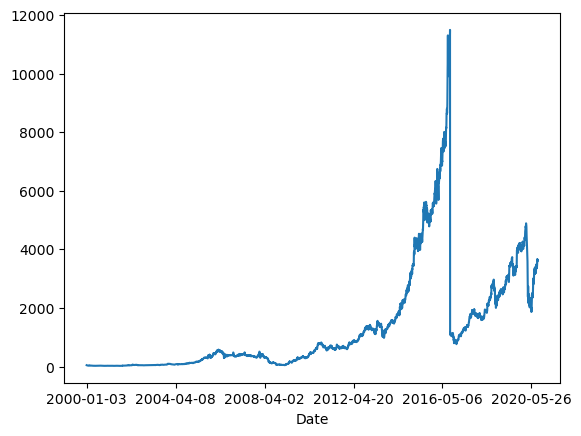

In [165]:
df["VWAP"].plot()

In [166]:
#By observation it is not constant

In [167]:
df.shape

(5070, 14)

In [168]:
df.isna().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [169]:
df.dropna(inplace= True)

In [170]:
df.isna().sum()


Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [171]:
df.shape

(2291, 14)

In [172]:
data= df.copy()

In [173]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [174]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [175]:
lag_features=['High','Low','Volume','Turnover','Trades']
window1=3
window2=7

In [176]:
for feature in lag_features:
    data[feature+'rolling_mean_3']=data[feature].rolling(window=window1).mean()
    data[feature+'rolling_mean_7']=data[feature].rolling(window=window2).mean()

In [177]:
for feature in lag_features:
    data[feature+'rolling_std_3']=data[feature].rolling(window=window1).std()
    data[feature+'rolling_std_7']=data[feature].rolling(window=window2).std()

In [178]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7'],
      dtype='object')

In [179]:
data.isna().sum()

Symbol                    0
Series                    0
Prev Close                0
Open                      0
High                      0
Low                       0
Last                      0
Close                     0
VWAP                      0
Volume                    0
Turnover                  0
Trades                    0
Deliverable Volume        0
%Deliverble               0
Highrolling_mean_3        2
Highrolling_mean_7        6
Lowrolling_mean_3         2
Lowrolling_mean_7         6
Volumerolling_mean_3      2
Volumerolling_mean_7      6
Turnoverrolling_mean_3    2
Turnoverrolling_mean_7    6
Tradesrolling_mean_3      2
Tradesrolling_mean_7      6
Highrolling_std_3         2
Highrolling_std_7         6
Lowrolling_std_3          2
Lowrolling_std_7          6
Volumerolling_std_3       2
Volumerolling_std_7       6
Turnoverrolling_std_3     2
Turnoverrolling_std_7     6
Tradesrolling_std_3       2
Tradesrolling_std_7       6
dtype: int64

In [180]:
data.dropna(inplace= True)

In [181]:
independent_features=['Highrolling_mean_3', 'Highrolling_mean_7',
       'Lowrolling_mean_3', 'Lowrolling_mean_7', 'Volumerolling_mean_3',
       'Volumerolling_mean_7', 'Turnoverrolling_mean_3',
       'Turnoverrolling_mean_7', 'Tradesrolling_mean_3',
       'Tradesrolling_mean_7', 'Highrolling_std_3', 'Highrolling_std_7',
       'Lowrolling_std_3', 'Lowrolling_std_7', 'Volumerolling_std_3',
       'Volumerolling_std_7', 'Turnoverrolling_std_3', 'Turnoverrolling_std_7',
       'Tradesrolling_std_3', 'Tradesrolling_std_7']

In [182]:
training_data=data[0:1800]
test_data=data[1800:]

In [183]:
training_data.tail(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-07,BAJFINANCE,EQ,2684.1,2698.4,2751.4,2672.6,2745.0,2744.20,2716.32,1264436,...,16.755397,106.101111,2.386071,100.988340,307128.544854,599913.723573,8.394860e+13,1.641199e+14,12123.301421,25604.694191
2018-09-10,BAJFINANCE,EQ,2744.2,2732.0,2738.0,2596.0,2607.6,2615.65,2655.39,1570179,...,10.147413,84.670766,43.882722,74.650851,218098.451125,592650.415369,5.493903e+13,1.647685e+14,15501.359822,25567.783116


In [184]:
training_data.head(2)

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Highrolling_std_3,Highrolling_std_7,Lowrolling_std_3,Lowrolling_std_7,Volumerolling_std_3,Volumerolling_std_7,Turnoverrolling_std_3,Turnoverrolling_std_7,Tradesrolling_std_3,Tradesrolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-09,BAJFINANCE,EQ,635.6,639.80,647.00,630.00,630.0,631.1,638.27,31252,...,12.769789,7.494911,15.011107,9.410145,13497.047986,18373.894011,8.665128e+11,1.155773e+12,354.841279,463.94232
2011-06-10,BAJFINANCE,EQ,631.1,641.85,648.25,618.55,621.1,622.2,634.16,30885,...,1.639360,8.227994,13.030765,9.501961,2434.970705,18047.331029,1.579562e+11,1.136003e+12,272.875429,448.02062


In [185]:
#We will use ARIMA Machine learning model 
# AR+I+MA-- Autoregressive model(p)+ integrating(d) + moving average(q)

In [186]:
"""
Study from youtube
ARIMA model--
Using PACF we can get p (PACF= Partial auto correlation factor)
using differencing we can get d
using ACF we can get q
auto ARIMA= Automatically when we get p,d,q
"""

'\nStudy from youtube\nARIMA model--\nUsing PACF we can get p (PACF= Partial auto correlation factor)\nusing differencing we can get d\nusing ACF we can get q\nauto ARIMA= Automatically when we get p,d,q\n'

In [187]:
"""
Study from yt
ACF=  
x1= aplha*x2+ some error .....eq1
suppose x1,x2,x3, x4, x5, x6, x7, x8 are data sets
so eq1 is true till x4,
so q= 5 as correlation is breaking after x4 from x5 
example- 10,20,30,40,44....
"""

'\nStudy from yt\nACF=  \nx1= aplha*x2+ some error .....eq1\nsuppose x1,x2,x3, x4, x5, x6, x7, x8 are data sets\nso eq1 is true till x4,\nso q= 5 as correlation is breaking after x4 from x5 \nexample- 10,20,30,40,44....\n'

In [188]:
"""
PACF AND ACF are used to minimise the effect of correlation in data
Differencing is used to making data stationary
stationarity when variable is constant w.r.t time"""

'\nPACF AND ACF are used to minimise the effect of correlation in data\nDifferencing is used to making data stationary\nstationarity when variable is constant w.r.t time'

In [189]:
!pip install pmdarima 


[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [190]:
from pmdarima import auto_arima 
#pmd= pyramid arima

In [191]:
import warnings
warnings.filterwarnings('ignore')

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=20931.542, Time=2.92 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=20925.228, Time=1.80 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=20926.352, Time=1.89 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=20926.324, Time=2.43 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32616.913, Time=1.79 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=20929.238, Time=2.55 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 13.393 seconds


<Axes: xlabel='Date'>

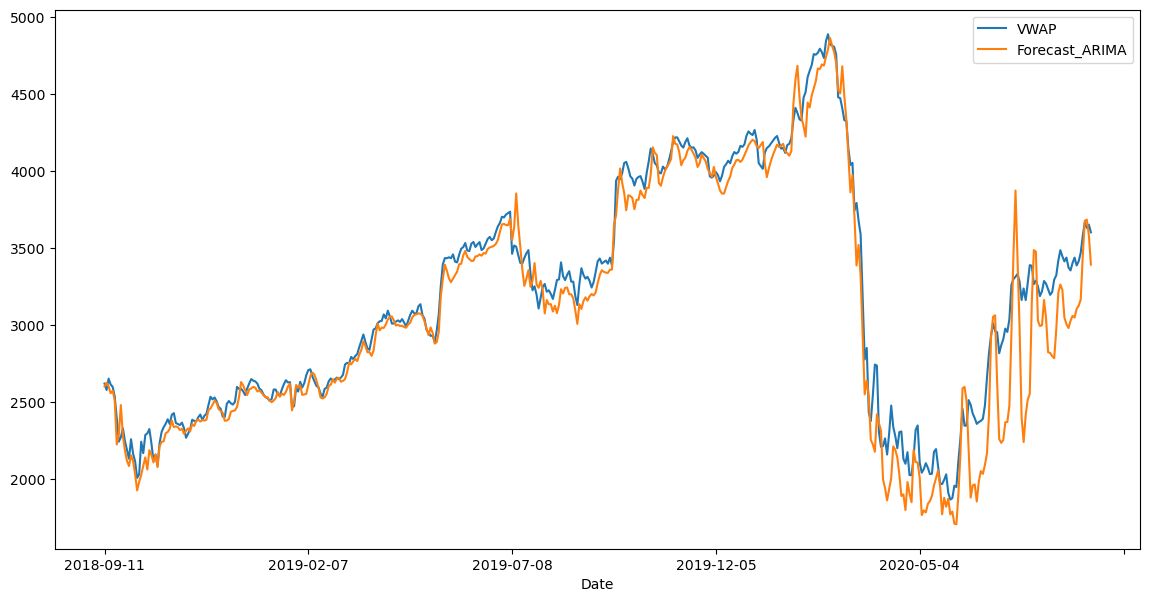

In [192]:
model = auto_arima(y = training_data['VWAP'] , X = training_data[ind_features], trace=True)
 
forecast = model.predict(n_periods=len(test_data), X = test_data[ind_features])
 
test_data['Forecast_ARIMA'] = forecast.values
test_data[['VWAP' , 'Forecast_ARIMA']].plot(figsize=(14,7))
 

In [193]:
#Checking accuracy of model--

In [194]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(np.sqrt(mean_squared_error(test_data['VWAP'],test_data['Forecast_ARIMA'])))
 
print(mean_absolute_error(test_data['VWAP'],test_data['Forecast_ARIMA']))

187.77968190575024
124.65681891809649
